In [1]:
# %matplotlib agg
import sys
sys.path.insert(0, "../..")

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

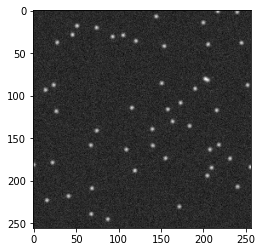

In [3]:
data = np.load("data/data.npy")
data = (data - np.min(data)) / np.ptp(data)

plt.imshow(data[0], cmap="gray")
plt.show()

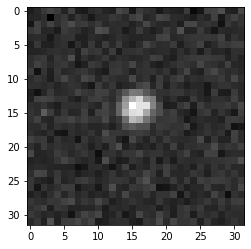

In [4]:
crop = data[0, 100:132, 100:132]
plt.imshow(crop, cmap="gray")

In [5]:
training_data = dt.Value(crop)

In [6]:
model = dt.models.LodeSTAR(input_shape=(None, None, 1))

In [7]:
plotter = dt.visualization.TrainingLossPlotter(["total_loss", "consistency_loss"])
plotter2 = dt.visualization.TrainingSpeedPlotter()
cb = dt.visualization.VisualizationCallback(plotters=[plotter, plotter2])

Generating 177 / 160 samples before starting training
Epoch 1/30


KeyboardInterrupt: 

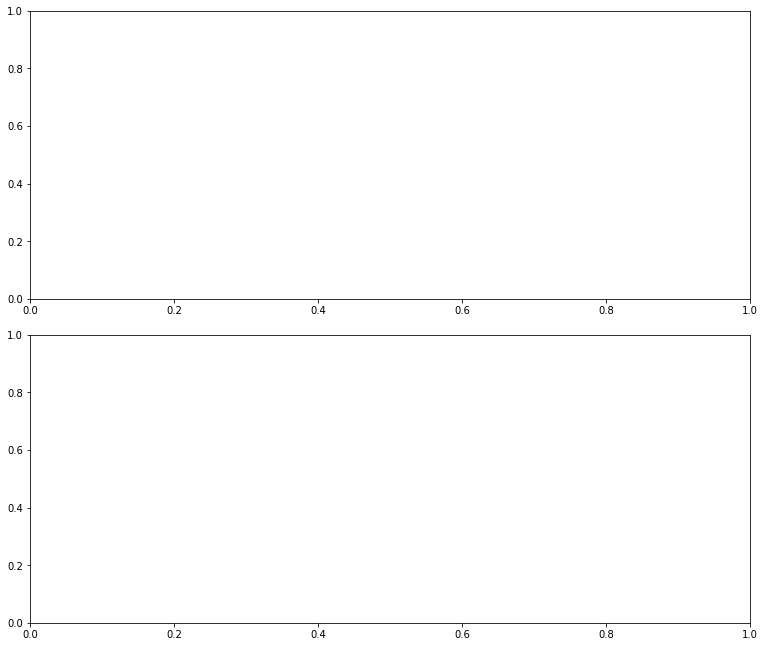

In [8]:
model.fit(training_data, epochs=30, batch_size=8, callbacks=[cb])

In [ ]:
all_detections = model.predict_and_detect(data)

for frame, frame_detections in zip(data, all_detections):
    plt.imshow(frame)
    plt.scatter(frame_detections[:, 1], frame_detections[:, 0], marker="x")
    plt.show()